# Decision Tree Classifier 

- Decision tree atau pohon keputusan adalah mencari akar sebagai fitur yang memiliki pengaruh tertinggi pada kasus. kemudian fitur lainnya akan berada dibawah fitur akar sebagai cabang hingga sampai daun. pada tingkatan dayn perhitungan sudah tidak dilakuakn karena akhir dari struktur sebuah pohon. 
- setelah pemodelan pohon dibuat, maka akan menghasilkan aturan IF-Then 

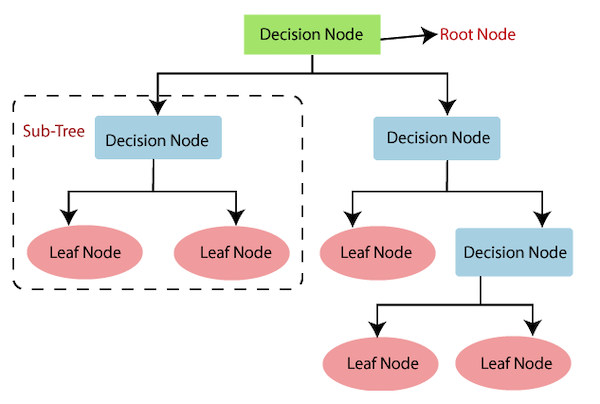

pada gambar diatas, 
- Root Node, disebut juga node induk. Node pertama yang ditempati oleh fitur dengan nilai informasi tertinggi
- Decision Node, pemisah sub-node menjadi lebih banyak sub-node
- Leaf Node, node terminal karena tidak dapat dipisahkan lagi
- sub tree, disebut cabang yaitu bagian pohon dari pohon keseluruhan


# Menentukan Root Node

Bagaimana cara menentukan fitur dengan nilai tertinggi untuk menjadi root node ? 
- yaitu dengan menggunakan feature importance, bagian dari metode embedded.

## 1. Menggunakan Feature Importance

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("dataset/train.csv")
print (data.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [2]:
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [3]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [4]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.05962932 0.01966771 0.0332487  0.01999373 0.0324556  0.0172375
 0.03519653 0.03324058 0.03525482 0.03238715 0.0331499  0.04557748
 0.04885642 0.40034923 0.03352525 0.03364487 0.0346844  0.01445654
 0.01768952 0.01975476]


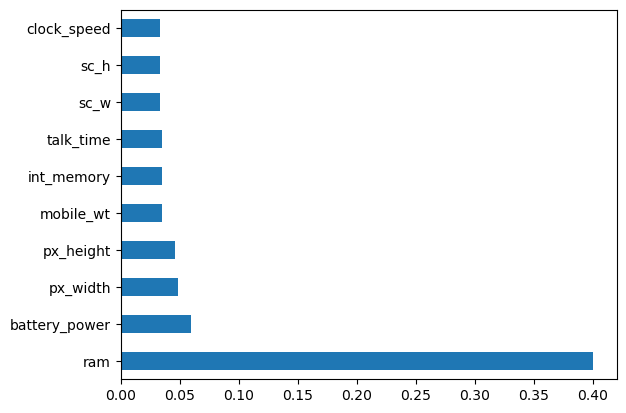

In [5]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**insight:**
- dari gambar diatas diketahui bahwa feature `RAM` memiliki pengaruh yang paling tinggi dibandingkan feature lainnya. sehingga dapat dijadikan sebagai Root Node

## 2. Penentuan secara manual

- Untuk menentukan root node dilakukan dengan menghitung entropi dan information gain 

### Entropi

- entropi adalah ukuran ketidakteraturan atau dapat juga disebut sebagai ukuran kemurnian (purity)
- dimana ketika nilai entropi tinggi maka nilai purity nya rendah
- nilai entropi berkisar 0 - 1 
- tujuan kita adalah mengurangi ketidakteraturan atau memperkecil nilai entropy

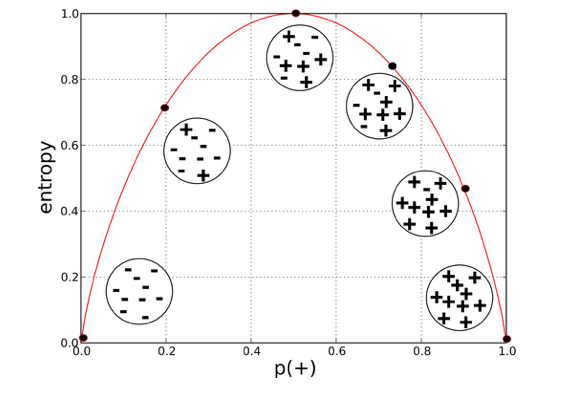

pada grafik diatas diketahui,
- ketika nilai entropy = 0, data semakin homogen (sejenis) 
- ketika nilai entropy = 1, data semakin heterogen (beragam jenisnya)

### Information Gain

- information gainadalah teknik mengurangi ketidakteraturan entropi sehingga bisa mendapatkan ukuran informasi dari hasilnya. 
- semakin besar informasi gain maka semakin banyak informasi yang didapat
- Proses perhitungan Information Gain melibatkan konsep entropy. Entropy mengukur tingkat ketidakpastian atau kekacauan dalam sebuah set data. Entropy dihitung untuk setiap node sebelum dan sesudah pemisahan berdasarkan suatu atribut, dan Information Gain diukur sebagai perbedaan antara entropi sebelum dan sesudah pemisahan.


# 2. Decision Tree dalam Python

Decision tree dapat dilakukan pada dataset kategorik dan dataset numerik. berikut penjelasannya.

## 2.1 Decision Tree Classifier pada dataset Kategorik

### a. Import Library 

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### b. Membaca File 

In [7]:
df = pd.read_csv('dataset/golf.csv')
df.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### c. Menentukan Variable Target dan Prediktor

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

### d. Melakukan One-Hot encoding

In [9]:
one_hot=pd.get_dummies(df[['Outlook', 'Temp.', 'Humidity', 'Wind']],drop_first=False)
one_hot = one_hot.astype(int)
one_hot.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temp._Cool,Temp._Hot,Temp._Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1


menghapus kolom-kolom yang digunakan dalam melakukan one-hot encoding pada dataframe utama `df`, karena sudah tidak digunakan

In [10]:
df=df.drop(['Outlook', 'Temp.', 'Humidity', 'Wind'],axis=1)

In [11]:
df = (df == "Yes").astype(int)

In [12]:
print(df.head())

   Decision
0         0
1         0
2         1
3         1
4         1


setelah dihapus selajutnya menggabungkan dataframe `df` dengan dataframe hasil one-hot encoding 

In [13]:
X=pd.concat([one_hot,df],axis=1)

In [14]:
print(X.head())

   Outlook_Overcast  Outlook_Rain  Outlook_Sunny  Temp._Cool  Temp._Hot  \
0                 0             0              1           0          1   
1                 0             0              1           0          1   
2                 1             0              0           0          1   
3                 0             1              0           0          0   
4                 0             1              0           1          0   

   Temp._Mild  Humidity_High  Humidity_Normal  Wind_Strong  Wind_Weak  \
0           0              1                0            0          1   
1           0              1                0            1          0   
2           0              1                0            0          1   
3           1              1                0            0          1   
4           0              0                1            0          1   

   Decision  
0         0  
1         0  
2         1  
3         1  
4         1  


### e. Melakukan splitting Data 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### f. Melakukan Pemodelan Decision Tree

In [16]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
# melakukan pemodelan dengan algoritma decision tree berdasarkan kriteria entropy
# max_depth adalah mengukur kedalaman maksimum pohon yang dibuat. jika tidak ditentukan maka node akan sangat banyak karena purity yang diinginkan tinggi
# min_samples_leaf adalah jumlah minimum sample yang diperlukan untuk berada di node daun

model.fit(X_train, y_train)
# melakukan fitting model dari dataset yang sudah disiapkan

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

### g. Melakukan Prediksi Data

In [18]:
y_pred = model.predict(X_test)

## h. Melakukan Uji Peforma model

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


--------------------

## 2.2 Decision Tree Classifier pada dataset Numerik

### a. Import Library

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

### b. Membaca Data

In [23]:
df=pd.read_csv('dataset/golf_label_num.txt')
df.head()

,Outlook,Temperature,Humidity,Wind,Decision
0,1,1,1,1,1
1,1,1,1,2,1
2,2,1,1,1,2
3,3,2,1,1,2
4,3,3,2,1,2


### c. Menentukan variable target dan variable prediktor

In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

### d. Melakukan Splitting data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### e. Melakukan pemodelan decision tree

In [31]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1234,max_depth = 5, min_samples_leaf = 10)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=1234)

### f. Memprediksi Model

In [32]:
y_pred = model.predict(X_test)

### g. Uji akurasi Model

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


# Kelebihan dan Kekurangan Decision Tree

### kelebihan 
- mudah diterapkan tanpa penggunaan statistika lanjutan
- tidak memerlukan normalisasi data pada saat pre-processing
- tidak perlu melakukan scalling
- nilai yang hilang tidak mempengaruhi sebagian besar proses decision tree
- model yang intuitif dan mudah dijelaskan ke stakeholder

### Kekurangan
- model yang sensitif karena sedikit perubahan hyperparamter akan mengubah hasil
- kurang cocok pada dataset berdimensi tinggi
- komputasi data yang berat dan kompleks saat pemodelan
- model kurang cocok pada tipe data numerik
- penggunaan max_depth yang berlebih menyebabkan overfitting